# Shampoo Sales Dataset

In this notebook we will look at the monthly sales of shampoo over a three year period. We will be training our model on the first two years of sales and test our model on the final year.

The goal of this study is to build a deep learning model that predicts the future shampoo sales in order to manufacture the right amount of shampoo in the future and increase profit. In other words, this model helps the shampoo company decrease the amount of overestimation or underestimation of the number of shampoo bottles they should manufacture.

# Data Exploration

Let's have a look at the dataset we will be using (Makridakis, Wheelwright, and Hyndman (1998)).

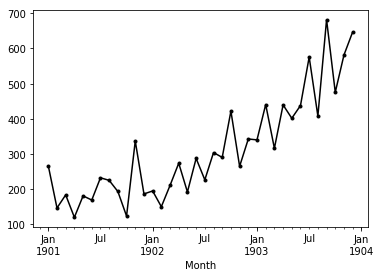

In [2]:
import numpy
import pandas as pd
from pandas import datetime as dt
from matplotlib import pyplot as plt

def parser(x):
    return dt.strptime('190'+x, '%Y-%m')

monthly_df = pd.read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
monthly_df.plot(style='-k.')
plt.show()

The most obvious thing about this figure is that shampoo sales are increasing year per year. By the looks of it, the overall sales of the next year (1904 to 1905) will be more than all the previous years. We will now group the sales of shampoo in periods of 4 months in order to get an even clearer seperation from the first and final year.

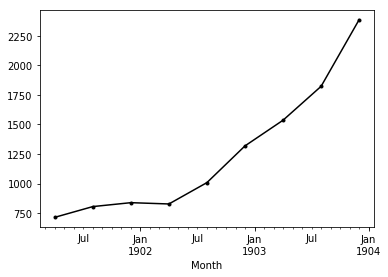

In [3]:
M4_df = monthly_df.resample('4M', closed='left').sum()
M4_df.plot(style='-k.')
plt.show()

The curve in this figure makes me think that grouping several months together could be a helpful feature for our model. We can also derive this curve in order to have an idea of the growth of sales.

In [4]:
M4_df.diff()

Month
1901-04-30      NaN
1901-08-31     90.8
1901-12-31     33.0
1902-04-30    -10.9
1902-08-31    180.8
1902-12-31    310.3
1903-04-30    217.0
1903-08-31    286.5
1903-12-31    563.7
Name: Sales of shampoo over a three year period, dtype: float64

We can plot the autocorrelation plot in order to see if there are any cycles in our data. In other words, it could be that our data shows strong signs of seasonality and that could be helpful for our feature selection.

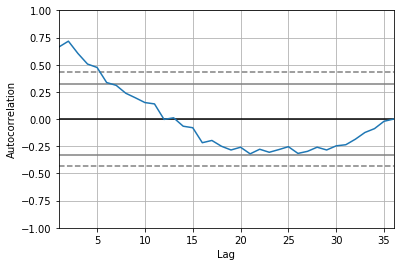

In [5]:
pd.plotting.autocorrelation_plot(monthly_df)
plt.show()

The dotted lines in this figure indicate that any correlation values above those lines are statistically significant. Overall, the correlation between the monthly shampoo sales is not meaningful.

Unfortunately, we only have 36 datapoints and there are only so many useful ways we can arrange our dataset in order to increase the number of features and present our data in insightful ways.

# Baseline model

We will start by creating a baseline model in order to compare its performance to the other more sophisticated models we will be building. The baseline model we will be using is called the persistence algorithm. The persistence algorithm uses the value at the previous time step (t-1) to predict the expected outcome at the current time step (t). The persistence algorithm is very simple and easy to use and that is precisely why we use it as a baseline.

We'll also be using the rolling forecast scenario (walk-forward validation) for this problem. Therefore, each step of the test set will be taken one step at a time. Once the model has made its forecast for the time step (ex: t+1), the model will receive the actual expected value from the test set in order to forecast the next time step (ex: t+2).

RMSE: 136.761


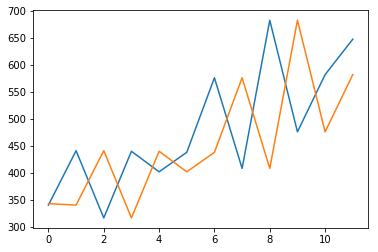

In [6]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# split data into train and test sets
X = monthly_df.values
train, test = X[0:-12], X[-12:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range (len(test)):
    # make prediction
    predictions.append(history[-1])
    # observation
    history.append(test[i])
    
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

# line plot of observed vs predicted
plt.plot(test)
plt.plot(predictions)
plt.show()

# Sophisticated Models

We will be using the following models: Long Short Term Memory (LSTM), Autoregressive Integrated Moving Average (ARIMA) and Multilayer Perceptron (MLP). Each of them have their pros and cons, but I have a feeling the MLP will perform the best on this dataset.

First of all, LSTMs are a type of recurrent neural network and they require a lot of data to perform their best, which is not the case in this dataset. ARIMA works better 